In [11]:
# Gaussian discriminant analysis in 2d
# Author: Duane Rich, heavily modified by Kevin Murphy
# Based on matlab code by Kevin Murphy
# https://github.com/probml/pmtk3/blob/master/demos/discrimAnalysisDboundariesDemo.m

import numpy as np
import matplotlib.pyplot as plt

def make_data(u, sigma, n_samples=30):
    # generate random points
    x = []  # store sample points
    labels = []  # store class labels
    nclasses = len(u)  # means
    for i in range(nclasses):
        x.append(np.random.multivariate_normal(u[i], sigma[i], n_samples))
        labels.append([i] * n_samples)
    return x, labels

def make_grid(x, ngrid=200):
    points = np.vstack(x)
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    x_range = np.linspace(x_min - 1, x_max + 1, ngrid)
    y_range = np.linspace(y_min - 1, y_max + 1, ngrid)
    xx, yy = np.meshgrid(x_range, y_range)
    return xx, yy

from sklearn.preprocessing import OneHotEncoder
def make_one_hot(yhat):
    yy = yhat.reshape(-1, 1) # make 2d
    enc = OneHotEncoder(sparse=False)
    Y = enc.fit_transform(yy)
    return Y

def plot_points(x, ax):
    for c, m, point in zip('bgr', 'xos', x):
        ax.plot(point[:, 0], point[:, 1], c+m)

from scipy.stats import multivariate_normal
def plot_contours(xx, yy, u, sigma, ax):
    for _c, _u, _sigma in zip('bgr', u, sigma):
        prob = multivariate_normal.pdf(np.dstack((xx, yy)), mean=_u, cov=_sigma)
        ax.contour(xx, yy, prob, colors=_c)

def plot_dboundaries(xx, yy, z, ax):
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), alpha=0.1, cmap='jet')
    for z_p in make_one_hot(z).T:
        ax.contour(xx, yy, z_p.reshape(xx.shape), [0.5], linewidths=3, colors='k')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
def plot_model(model, figsize=(10,10)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axes = axes.ravel()

    u, sigma = model
    x, labels = make_data(u, sigma)
    plot_points(x, axes[0])
    #savefig("gda_2d_data.pdf")

    xx, yy = make_grid(x)
    plot_contours(xx, yy, u, sigma, axes[1])
    #savefig("gda_2d_contours.pdf")
    xy = np.c_[xx.ravel(), yy.ravel()]

    X = np.vstack(x)
    Y = np.hstack(labels)
    for clf, model_name, ax in zip((LDA(), QDA()), ('LDA', 'QDA'), axes[2:]):
        clf.fit(X, Y)
        plot_dboundaries(xx, yy, clf.predict(xy), ax)
        plot_points(x, ax)
        plot_contours(xx, yy, u, sigma, ax)
        ax.set_title(model_name)
        #savefig(f"gda_2d_{model_name}.pdf")

    for ax in axes:
        ax.axis('scaled')
    fig.tight_layout()

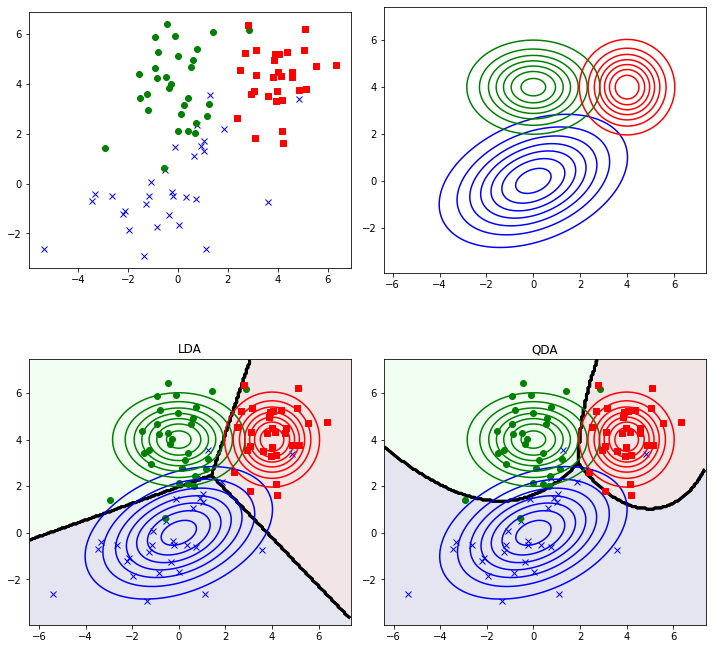

In [12]:
model1 = ([[1.5, 1.5], [-1.5, -1.5]], [np.eye(2)] * 2)
model2 = ([[1.5, 1.5], [-1.5, -1.5]], [[[1.5, 0], [0, 1]], np.eye(2) * 0.7])
model3 = ([[0, 0], [0, 5], [5, 5]], [np.eye(2)] * 3)

Sigma1 = np.array([[4, 1], [1, 2]])
Sigma2 = np.array([[2, 0], [0, 1]])
Sigma3 = np.eye(2)
model4 = ([[0, 0], [0, 4], [4, 4]], [Sigma1, Sigma2, Sigma3])

plot_model(model4)